## Evaluating a classification model - how to evaluate how good your model is?
https://www.youtube.com/watch?v=85dtiMz9tSo

1. Regression problems: Mean Absolute Error, Mean Squared Error, Root Mean Squared Error
2. Classification problems: Classification accuracy

## Method 1:  Classification Accuracy method

In [6]:
import pandas as pd
# url="https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
col_names = ["pregnant", "glucose", "bp", "skin", "insulin", "bmi", "pedigree", "age", "label"]
# pima=pd.read_csv(url, header=None, names=col_names)
pima = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Question:  Can we predict the diabetes status of a patient given their health measurements?

In [7]:
# define X and y
feature_cols = ["pregnant", "insulin", "bmi", "age"]
X = pima[feature_cols]
y = pima.label

In [10]:
# Split it
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [17]:
# Train Logistic Regression model. The model is learning the relationship between
# X_train and y_train

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
# make predictions for Testing data
y_pred_class = logreg.predict(X_test)

#### Review CLASSIFICATION accuracy: % of CORRECT PREDICTIONS (using metric.accuracy_score)

In [16]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.6770833333333334


#### Review NULL accuracy: Accuracy that could be achieved by always predicting the most frequent class
 * Null accuracy answers the question:  IF my model was to predict the PREDOMINANT CLASS (i.e. 0) 100% of the time, how OFTEN will it be correct?
 * Note: Method below only works because it is only 1 and 0

In [18]:
# Examine the class distribution of the testing set
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [23]:
# Calculate the percentage of ones 
y_test.mean()


0.3229166666666667

In [27]:
# Calculate the percentage of zeros (NULL Accuracy)
1 - y_test.mean()

# Note1: Here, 68% is greater than 32%, 68% if the NULL ACCURACY
#       for this problem.
# Note2: A DUMB model that always predicts a patient DOES NOT have diabetes, 
#        will be correct 68% of the time.
# Note3: Compare NULL accuracy (68%) with the ACCURACY_SCORE (68%).  Now,
#        our model DOES NOT look very good.  Think of NULL accuracy as a baseline.

0.6770833333333333

In [28]:
# Another method. Calculate the NULL accuracy (for binary classification problem for zeros and ones)
max(y_test.mean(), 1 - y_test.mean())

0.6770833333333333

In [29]:
# Calculate NULL accuracy for MULTI-CLASS classification problems 
# Will only work if y_test is a PANDA SERIES. Make sure
# the most frequent class is at row 1!!

y_test.value_counts().head(1) / len(y_test)

0    0.677083
Name: label, dtype: float64

#### Comparing the TRUE and PREDICTED response values
* There is a pattern.  When the TRUE is a 0, the models usually predicts also a 0.  BUT when the TRUE is a 1, the model usually NEVER predicts a 1.  Interesting.

In [32]:
print("True values: ", y_test.values[0:15])
print("Pred values: ", y_pred_class[0:15])

True values:  [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0]
Pred values:  [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0]


#### CONCLUSION FOR USING CLASSIFICATION ACCURACY:
1. Classification accuracy is the easiest classification metric to understand
2. BUT, it doesn't tell you the UNDERLYING DISTRIBUTION of response values via calculating null accuracy
3. Also it DOES NOT tell you what "TYPES" of ERRORS your classifier model is making.  

## Method 2:  Confusion Matrix method
* Loosely define as a TABLE that describes the performance of a classification model
* Outputs a 2x2 numpy array
* Good to use this to help you UNDERSTAND the PERFORMANCE for the model, but can it help you to choose between models? It is NOT a model evaluation metric. Can't tell sklearn to choose the model with the best confusion matrix. But there are many matrix which can be calculated from the CONFUSION matrix. You can use these to help you choose between models

In [33]:
# IMPORTANT! First argument is TRUE values, second arguments is PREDICTED VALUES
print(metrics.confusion_matrix(y_test, y_pred_class))

[[114  16]
 [ 46  16]]


* Every observation in the TESTING set is represented in exactly one box.
* Its a 2x2 because there are only 2 response classes here. If you had 5 outcomes, then it will be a 5x5 matrix


#### Basic Terminology for BINARY problem:
* TRUE POSITIVE (TP): We correctly predicted that they DO have diabetes
* TRUE NEGATIVE (TN): We correctly predicted that they DON'T have diabetes
* False positive (FP): We INCORRECTLY predicted that they do have diabetes (type 1 error)
* False negative (FN): We INCORRECTLY preidcted that they DON'T have diabetes (type II error)

In [35]:
# See if you can find examples of confusion matrix
print("True values: ", y_test.values[0:15])
print("Pred values: ", y_pred_class[0:15])

True values:  [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0]
Pred values:  [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0]


In [38]:
# Save cofusion matrix and slice into 4
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1] # falsely preicted a positive (1) when it was really a negative (0)
FN = confusion[1, 0] # falsely preicted a negative (0) when it was really a positive (1)

#### Metrics computed from a Confusion Matrix (to help you decide which model to choose)

In [41]:
# Metric 1 - Classification Accuracy - How often is the model correct in predicting?
# The accuracy_score function does the same thing

print((TP + TN) / float(TP+TN+FP+FN)) # Both are true
print(metrics.accuracy_score(y_test, y_pred_class))

0.6770833333333334
0.6770833333333334


In [42]:
# Metric 2 - CLASSIFICATION ERROR (Misclassification Rate) - How often is the model INCORRECT ?

print((FP+FN)/float(TP+TN+FP+FN)) # Both are FALSE
print(1 - metrics.accuracy_score(y_test, y_pred_class))


0.3229166666666667
0.32291666666666663


In [45]:
# Metric 3 - SENSITIVITY: when the actual value was positive, how often did it predict correctly?
# How "sensitive" is the classifier model to detecting POSITIVE instances?
# Also known as "TRUE POSITIVE RATE" or "RECALL"
# You want to MAXIMIZE (closer to 1 is best) this value because it predicting correctly

print(TP / float(TP+FN))
print(metrics.recall_score(y_test, y_pred_class))


0.25806451612903225
0.25806451612903225


In [46]:
# Metric 4 - SPECIFICITY: When the actual value is negative, how often was the prdiction correct?
# How specific/selective is the model in predicting positive instances?
# You want to MAXIMIZE (closer to 1 is best) this value because it predicting correctly
# No sklearn function for this.  Calculate manually

print (TN/float(TN+FP))

0.8769230769230769


#### Mini conclusion here: This model is highly SPECIFIC but not highly SENSITIVE

In [50]:
# Metric 5 - FALSE POSITIVE RATE: When the actual value is negative, how often is the prediction INCORRECT?
# 1 - SPECIFICITY

print(FP/float(TN+FP))

0.12307692307692308


In [51]:
# Metric 6 - PRECISION: When a positive value is predicted, how often is the prediction correct?
# How PRECISE is the model when predicting POSITIVE instances?

print(TP/float(TP+FP))
print(metrics.precision_score(y_test, y_pred_class))

0.5
0.5


#### CONCLUSION!!

1. Many other metrics can be calculated: F1 score, Matthew correlation coefficient etc.

2. Confusion matric gives you a more complete picture of how your classifier is performing
3. Also allows you to compute VARIOUS classification metrics and help guide model selection

4. Which metrics to focus on?
    * Depends on business objectives
    * Example 1:  If trying to figure SPAM filter moel, OPTIMIZE PRECISION OR SPECIFICITY because false negatives (SPAM does into INBOX) is more acceptable than false positives (non-spam is caught by spam filter)
    * Exmaple 2: OPTIMIZE SENSITIVITY because false positives (normal transactions that are flagged as possible frauds) is more acceptable than false negatives (fraudulent transactions that are NOT detected)


## Adjusting the classification threshold

In [52]:
# Print the first 10 predicted response
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [60]:
# Print the first 10 predicted PROBABILITIES of class membership
logreg.predict_proba(X_test)[0:10, :]

# 2 classes. On the left, probability of class 0, right, probability of class 1

array([[0.61405867, 0.38594133],
       [0.7505398 , 0.2494602 ],
       [0.74167648, 0.25832352],
       [0.60291327, 0.39708673],
       [0.88426611, 0.11573389],
       [0.87695895, 0.12304105],
       [0.50819992, 0.49180008],
       [0.44582289, 0.55417711],
       [0.77950769, 0.22049231],
       [0.25853303, 0.74146697]])

In [54]:
# Print the first 10 predicted PROBABILITIES of class 1
logreg.predict_proba(X_test)[0:10, 1]

array([0.38594133, 0.2494602 , 0.25832352, 0.39708673, 0.11573389,
       0.12304105, 0.49180008, 0.55417711, 0.22049231, 0.74146697])

In [61]:
# Store the prdicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [62]:
# allos plots
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

Text(0, 0.5, 'Frequency')

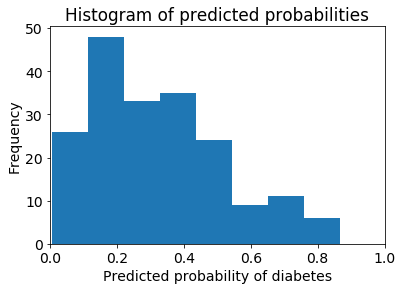

In [63]:
# Histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0,1)
plt.title("Histogram of predicted probabilities")
plt.xlabel("Predicted probability of diabetes")
plt.ylabel("Frequency")

#### Decrease the threshold for predicting diabetes in order to INCREASE THE SENSITIVITY of the classifier (ie. So, you get more cases of diabetes)


In [65]:
# Predict diabetes if the PREDICTED PROBABILITY is greater than 0.3

# from sklearn.preprocessing import binarize
# y_pred_class = binarize(y_pred_prob, 0.3)[0]

#### Conclusion!!

1. Threshold is 0.5 because it is a binary problem.  To convert PROBABILITIES INTO CLASS PREDICTIONS
2. Threshold can be adjusted to increase Sensitivity or Specificity (Its the very last thing you should do)
3. Sensitivity and Specificity have an INVERSE relationship

## ROC Curves and Area Under the Curve (AUC)
* Question:  Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the thresholds?
* Answer: Plot the ROC curve!!
    1. ROC curve can help you to choose a threshold that balances sensitivity and specificity
    2. You can't see the thresholds used to generate the curve on the ROC curve itself

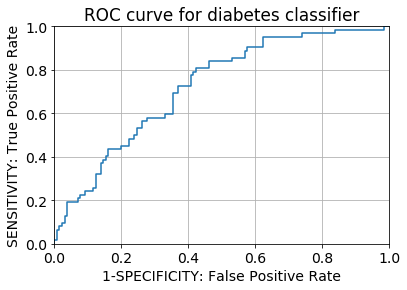

In [67]:
# IMPORTANT: First argument it true values, 2nd is predicted values
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("ROC curve for diabetes classifier")
plt.xlabel("1-SPECIFICITY: False Positive Rate")
plt.ylabel("SENSITIVITY: True Positive Rate")
plt.grid(True)

#### Based on the chart, if you want to achieve a sensitivity of 0.8, you have to be willing to accept a specificity of around 0.6 (1-0.4)

In [68]:
# define a function that accepts a threshold and prints sensitivity and specificity

def evaluate_threshold(threshold):
    print("Sensitivity: ", tpr[thresholds > threshold][-1])
    print("Specificity: ", 1-fpr[thresholds > threshold][-1])

In [69]:
# Evaluate 0.5 threshold
evaluate_threshold(0.5)

Sensitivity:  0.25806451612903225
Specificity:  0.8769230769230769


In [70]:
# Evaluate 0.3 threshold
evaluate_threshold(0.3)

Sensitivity:  0.7258064516129032
Specificity:  0.6307692307692307


#### AUC is the PERCENTAGE of the ROC plot that is underneath teh curve.
* AUC is useful as a single number summary of classifier performance
* If you randomly chose one positive and one negative observation, AUC represent the likelihood that your classifier will assign a higher preicted probability to the positive observation
* AUC is useful EVEN when there is HIGH CLASS IMBALANCE
* AUC is useful as a metric for choosing between models

In [73]:
# IMPORTANT: 1st argument it true value, 2nd is predicted values
# The closer to 1, the better the AUC score is
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7227047146401985


## CONCLUSION



#### Confusion matrix advantages:
1. Allows you to calculate a variety of metrics
2. Usefult for MULTI-CLASS problems (more than 2 responses)


#### ROC/AUC advantages:
1. Does not require you to set a classification threshold
2. Still useful when there is HIGH CLASS IMBALANCE